In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.columns #checking the column names

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [4]:
df.isna().any() #checking for missing values

Ticket #                       False
Customer Complaint             False
Date                           False
Date_month_year                False
Time                           False
Received Via                   False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

In [5]:
df.duplicated() #checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2219    False
2220    False
2221    False
2222    False
2223    False
Length: 2224, dtype: bool

In [6]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
df['date_index'] = df["Date_month_year"] + " " + df["Time"] #create new column

In [8]:
df['date_index'] = pd.to_datetime(df['date_index'])
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df = df.set_index(df['date_index'])
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


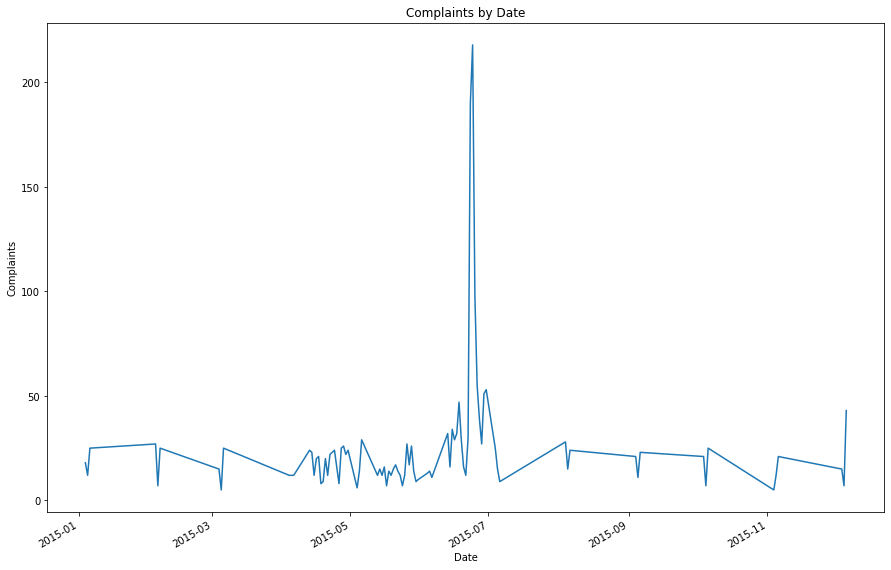

In [9]:
df['Date_month_year'].value_counts().plot(figsize=(15,10),
                                         title='Complaints by Date',
                                         xlabel='Date',
                                         ylabel='Complaints')
plt.savefig('dmy.jpg');

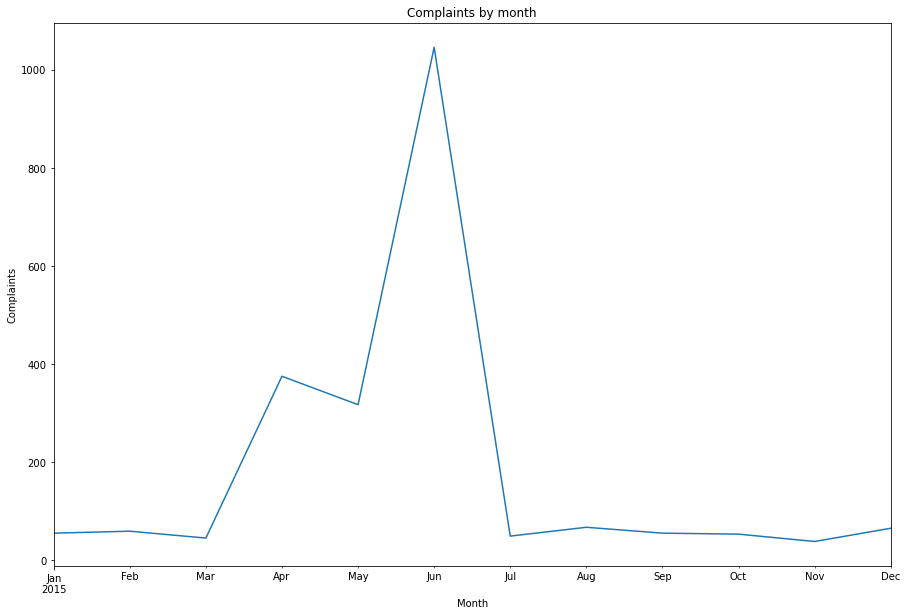

In [10]:
df.groupby(pd.Grouper(freq='M')).size().plot(figsize=(15,10),
                                            title='Complaints by month',
                                            xlabel='Month',ylabel='Complaints')
plt.savefig('month_complaint');

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
df['Day']

date_index
2015-04-22 15:53:50    Wednesday
2015-08-04 10:22:56    Wednesday
2015-04-18 09:55:47     Saturday
2015-07-05 11:59:35     Thursday
2015-05-26 13:25:26      Tuesday
                         ...    
2015-02-04 09:13:18     Thursday
2015-02-06 13:24:39      Tuesday
2015-09-06 17:28:41      Tuesday
2015-06-23 23:13:30      Tuesday
2015-06-24 22:28:33    Wednesday
Name: Day, Length: 2224, dtype: object

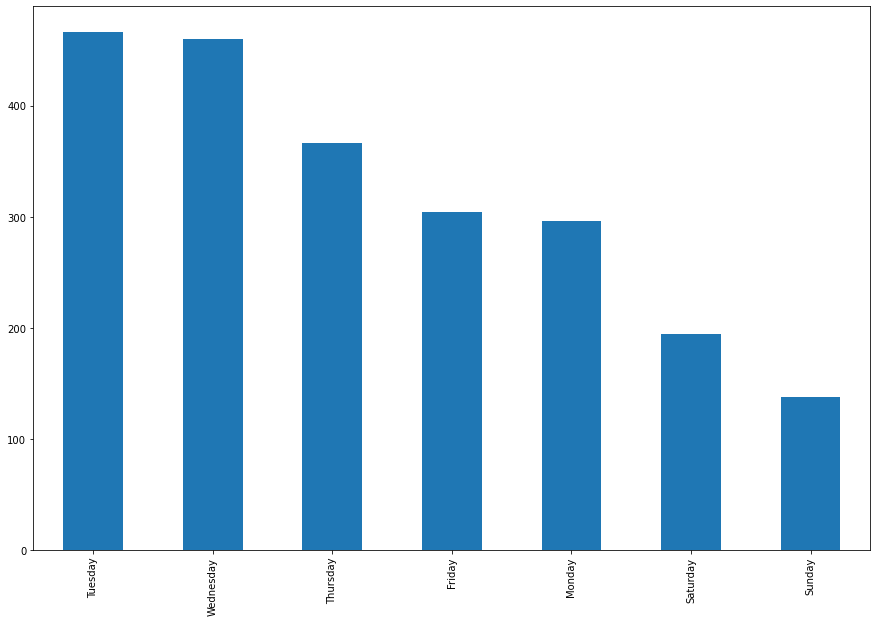

In [29]:
plt.figure(figsize=(15,10))
df['Day'].value_counts().plot(kind='bar')
plt.savefig('days.jpg');

In [28]:
cpl_type_counts = df['Customer Complaint'].value_counts()
cpl_type_counts

Comcast                                                  83
Comcast Internet                                         18
Comcast Data Cap                                         17
comcast                                                  13
Comcast Billing                                          11
                                                         ..
Week long issues with speed and no help from comcast      1
Customer Service & Billing                                1
CRAMMING, False Internet Promotion, SPEED complaint       1
Speeds lower than advertised                              1
Ongoing issue with bill, Supervisors, Issue Not Fixed     1
Name: Customer Complaint, Length: 1841, dtype: int64

In [29]:
complaint = cpl_type_counts[cpl_type_counts >= 10] #filtering for complaint with at least 10 complaints
complaint

Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Comcast Billing      11
Comcast Data Caps    11
Data Caps            11
Name: Customer Complaint, dtype: int64

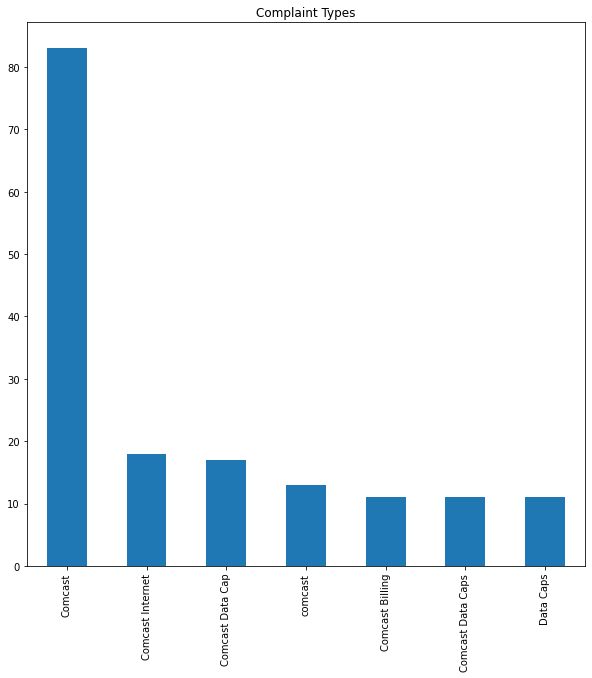

In [30]:
complaint.plot.bar(figsize=(10,10),title='Complaint Types');

In [31]:
df['Status_open'] = 0
df['Status_closed'] = 0
df.loc[(df['Status'] == 'Open') | (df['Status'] == 'Pending'), 'Status_open'] = 1
df.loc[(df['Status'] == 'Closed') | (df['Status'] == 'Solved'), 'Status_closed'] = 1
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Status_open,Status_closed
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,0,1
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,0,1
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,0,1
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,1,0
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,0,1


In [32]:
com_stack = df[:]
com_stack.rename(columns = {'Status_open':'Open','Status_closed':'Closed'},inplace=True)
com_stack.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Open,Closed
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,0,1
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,0,1
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,0,1
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,1,0
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,0,1


In [33]:
com_states = com_stack.groupby(['State'])['Open', 'Closed'].sum()
com_states

<ipython-input-33-dd3b0c2e5aaa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com_states = com_stack.groupby(['State'])['Open', 'Closed'].sum()


,Open,Closed
State,,
Alabama,9,17
Arizona,6,14
Arkansas,0,6
California,61,159
Colorado,22,58
Connecticut,3,9
Delaware,4,8
District Of Columbia,2,14
District of Columbia,0,1


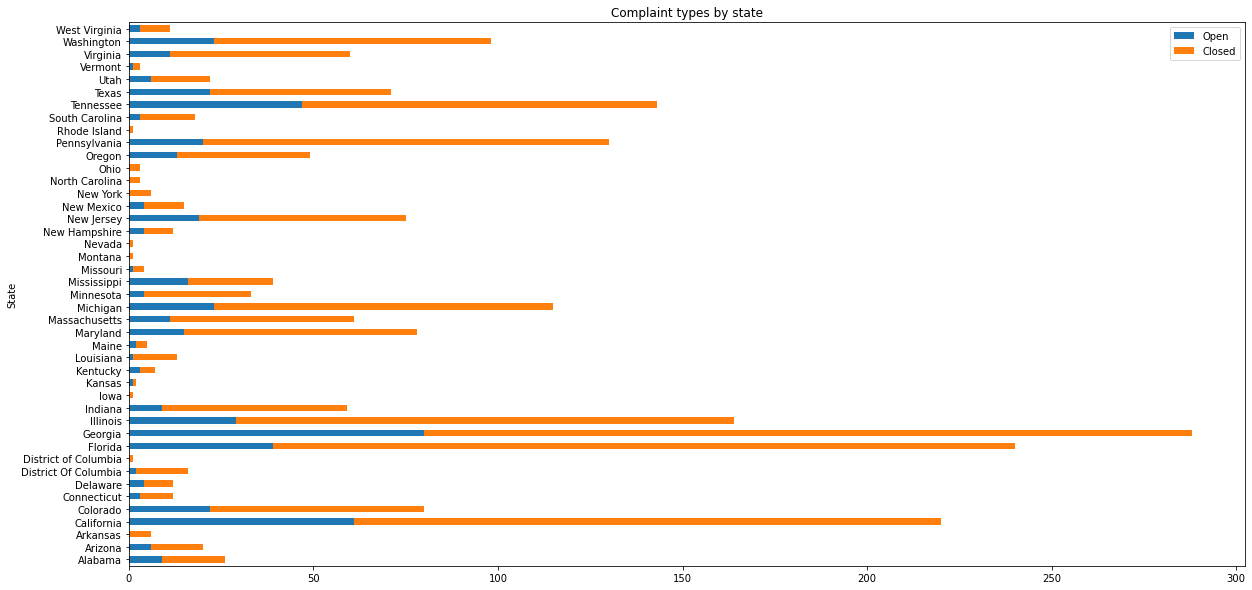

In [34]:
com_states.plot(kind='barh', stacked=True, figsize=(20,10))
plt.title('Complaint types by state')
plt.xticks(ha='center')
plt.savefig('complaint_state.jpg');

In [35]:
open_state = com_states['Open']
open_state

State
Alabama                  9
Arizona                  6
Arkansas                 0
California              61
Colorado                22
Connecticut              3
Delaware                 4
District Of Columbia     2
District of Columbia     0
Florida                 39
Georgia                 80
Illinois                29
Indiana                  9
Iowa                     0
Kansas                   1
Kentucky                 3
Louisiana                1
Maine                    2
Maryland                15
Massachusetts           11
Michigan                23
Minnesota                4
Mississippi             16
Missouri                 1
Montana                  0
Nevada                   0
New Hampshire            4
New Jersey              19
New Mexico               4
New York                 0
North Carolina           0
Ohio                     0
Oregon                  13
Pennsylvania            20
Rhode Island             0
South Carolina           3
Tennessee             

In [36]:
open_state.sum()

517

In [37]:
open_state.max()

80

In [38]:
state_unres = open_state.max()/open_state.sum()*100
print(f"Georgia has the highest number of unresolved complaints at {state_unres:.4}%")

Georgia has the highest number of unresolved complaints at 15.47%


In [39]:
state = com_states['Open']+com_states['Closed']
state.max()

288

In [55]:
resolved = com_stack.groupby(['Received Via'])['Closed'].sum()
com_closed = com_states.Closed.sum()
com_open = com_states.Open.sum()
coms = (com_closed/(com_open+com_closed))*100
print(resolved)
print(com_closed)
print(f"The percentage of resolved complaints stands at {coms:.2f}%")

Received Via
Customer Care Call    864
Internet              843
Name: Closed, dtype: int64
1707
The percentage of resolved complaints stands at 76.75%
